In [3]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

from IPython.display import Image

In [147]:
def graf_map(df,columna_x,columna_mAP,columna_loss,title):
    """
    grafica con formato similar al de Yolov4
    df : dataFrame
    columna_x: str nombre columna de epochs
    columna_mAP:str nombre columna datos mAP
    columna_loss:str nombre columna con Loss a graficar
    title:str  Título del gráfico
    
    """
    x = df[columna_x]
    y = df[columna_mAP]
    y1 = df[columna_loss]
    
    plt.style.use('default')
    fig, ax_l = plt.subplots(figsize=(5,5))
    ax_m = ax_l.twinx() #use diferent scales for loss and mAP
    
    # Customize grid
    ax_l.minorticks_on()
    ax_l.grid(which='major', linestyle='-', linewidth='0.5', color='black',alpha = 0.6)
    ax_l.grid(which='minor', linestyle='-', linewidth='0.5', color='grey',alpha = 0.3)
    
    # graphic 
    ax_l.scatter(x, y1, marker ='P', color = 'blue', label = columna_loss, s = 1,\
                 linewidths = 1)
    ax_m.plot(x, y, color = 'r',linewidth=0.7, label = columna_mAP)
    
    
    #set labels and legend
    #ax_m.set_ylabel(columna_mAP)
    ax_l.set_ylabel(columna_loss)
    ax_l.legend(loc = (-0.3,0.9),framealpha=0,fontsize='x-small')
    ax_m.legend(loc = (-0.3,1),framealpha=0,fontsize='x-small')
    ax_m.set(yticks=[])
    ax_l.set_ylim(ymax = df[columna_loss].max()*1.2 )
    
    
    #iteracion para agregar etiquetas de mAP
    for n in np.arange(df.index.size*0.4,df.index.size -1,(df.index.size*0.5)/4):
        ax_m.text(df[columna_x][round(n,0)], df[columna_mAP][round(n,0)]+0.04,\
                  '{0:.0%}'.format(df[columna_mAP][round(n,0)]),\
                  color = 'DarkRed',fontsize='small')

    ax_m.text(df[columna_x][df.index.size-1], df[columna_mAP][df.index.size-1]\
              ,'{0:.1%}'.format(df[columna_mAP][df.index.size-1]),\
              color = 'DarkRed',fontsize='small')
    # Resumen datos bajo el grafico
    plt.annotate(f'last avg loss= {df[columna_loss][df.index.size-1].round(2)}',\
                 xy=(150, 10),xycoords='figure pixels')
    plt.annotate(f'max mAP= {"{0:.2%}".format(df[columna_mAP].max())}',xy=(400, 10),\
                 xycoords='figure pixels');
    plt.title(title)
    plt.ioff()

In [269]:
dir = r'C:\Users\elois\OneDrive\Documents\MasterDS\Capstone\results'

yolov5 = pd.read_csv(rf'{dir}\results_Yolov5.csv').rename(str.strip, axis = 'columns' )
yolov6 = pd.read_csv(rf'{dir}\result_Yolov6.csv')
yolov7 = pd.read_excel(rf'{dir}\Results_Yolov7.xlsx', sheet_name = 'results_Yolov7')
yolov8 = pd.read_csv(rf'{dir}\results_Yolov8.csv').rename(str.strip, axis = 'columns' )

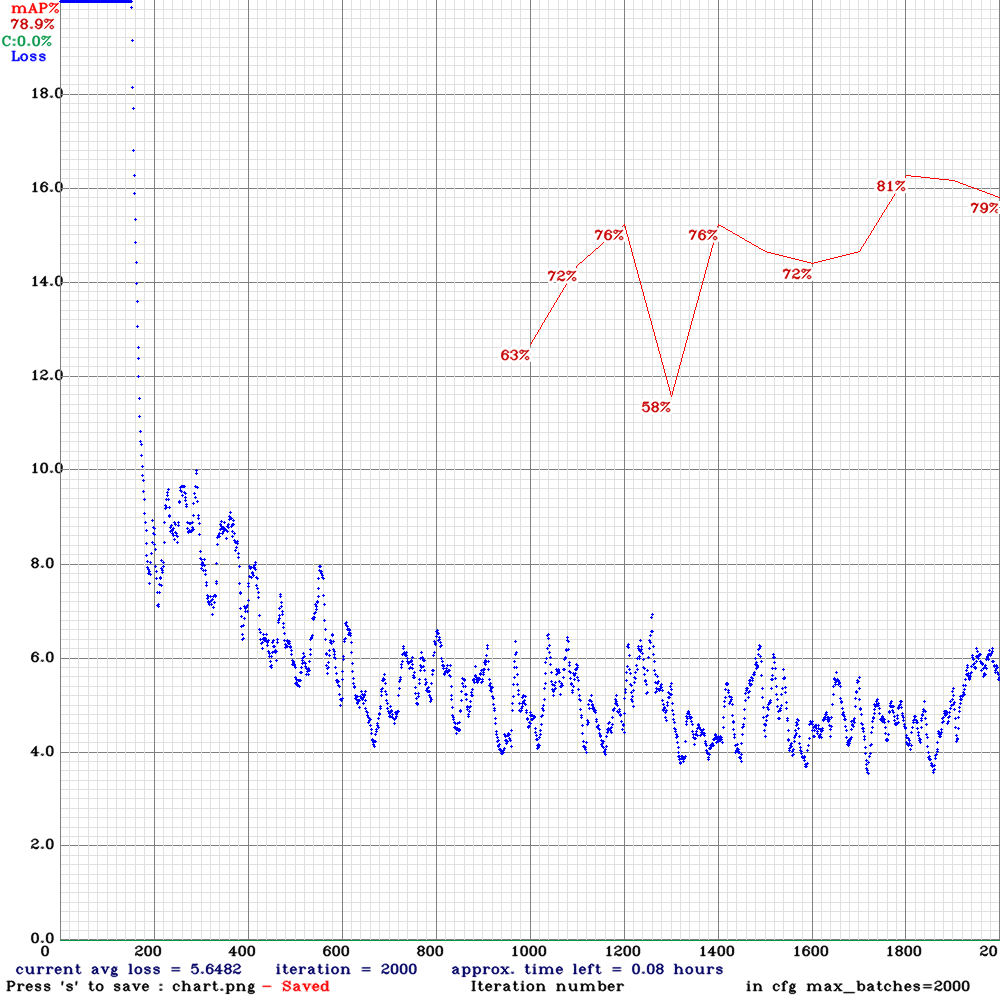

In [270]:
Image(rf'{dir}\chart_yolov4-custom.png', width= 400 , height = 100)

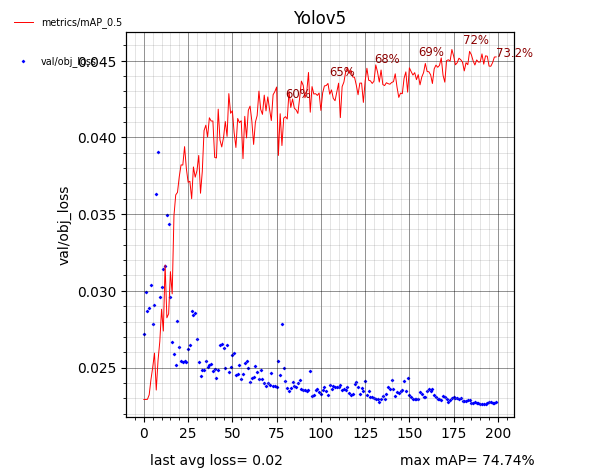

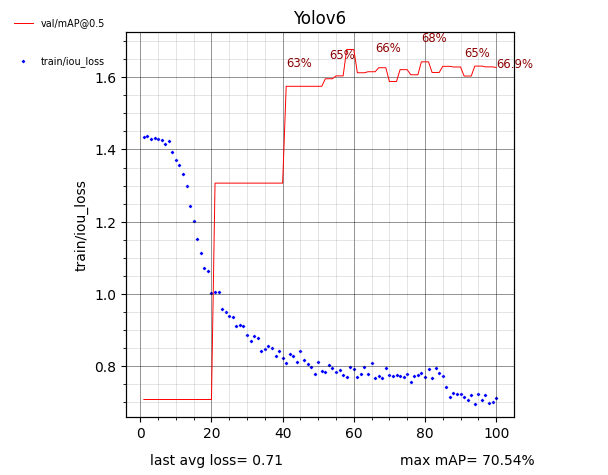

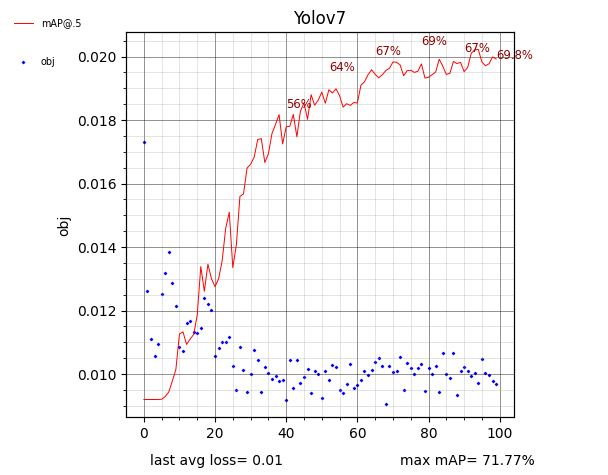

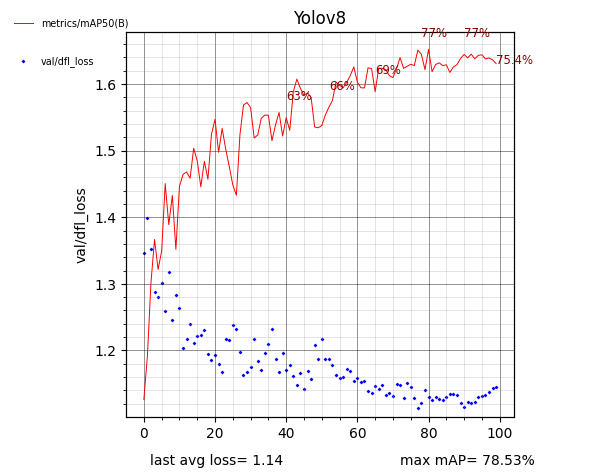

In [271]:
v5 = graf_map(yolov5,'epoch','metrics/mAP_0.5',\
         'val/obj_loss','Yolov5')
v6 = graf_map(yolov6,'step','val/mAP@0.5','train/iou_loss',"Yolov6")
v7 = graf_map(yolov7,'epoch','mAP@.5','obj',"Yolov7")
v8 = graf_map(yolov8,'epoch','metrics/mAP50(B)','val/dfl_loss',"Yolov8")

Para el caso de Yolov5, como se ve exactamente que a las 200 epocas sea necesario frenar
el entrenamiento, se hicieron 2 prubas.
1- con el mismo tamaño de imagen (416), para 500 epoch con early stoping 100
2- tamaño de imagen 640, para 500 epoch con early stoping 50
Vemos que en el primer caso el entrenamiento se interrumpe a las 413 epocas y máximo mAP 
es de 75% que se da en la epoch 206.
Para el segundo caso se corta el entrenamiento a los 212 y el mAP max es 81%,
que se la repeticion 140.

In [272]:
yolov5_640 = pd.read_csv(rf'{dir}\results_Yolov5-500e-640is.csv')\
            .rename(str.strip, axis ='columns')
yolov5_416 = pd.read_csv(rf'{dir}\results_Yolov5-500e-416is.csv')\
            .rename(str.strip, axis ='columns')
yolov5_416[yolov5_416["metrics/mAP_0.5"] ==0.75598]

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
206,206,0.049499,0.024418,0,0.78143,0.68698,0.75598,0.2516,0.058972,0.022962,0,0.005941,0.005941,0.005941


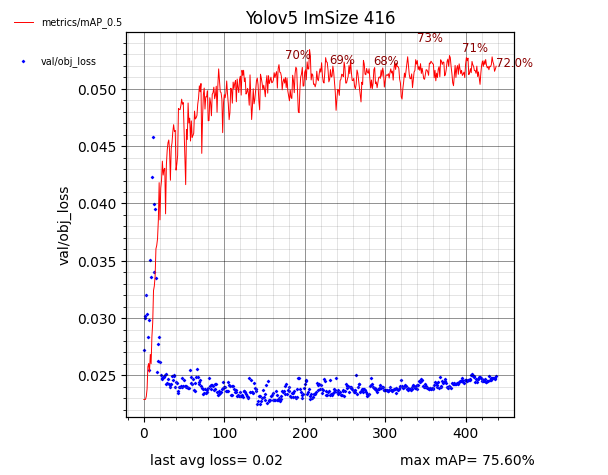

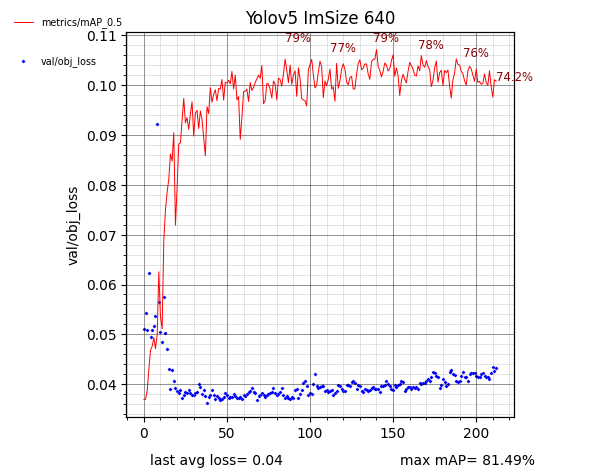

In [273]:
graf_map(yolov5_416,'epoch','metrics/mAP_0.5',\
         'val/obj_loss','Yolov5 ImSize 416')
graf_map(yolov5_640,'epoch','metrics/mAP_0.5',\
         'val/obj_loss','Yolov5 ImSize 640')

In [274]:
columns_yolov6 = yolov6.columns
columns_yolov6 = columns_yolov6.drop(['step','val/mAP@0.50:0.95','train/dist_focalloss'])

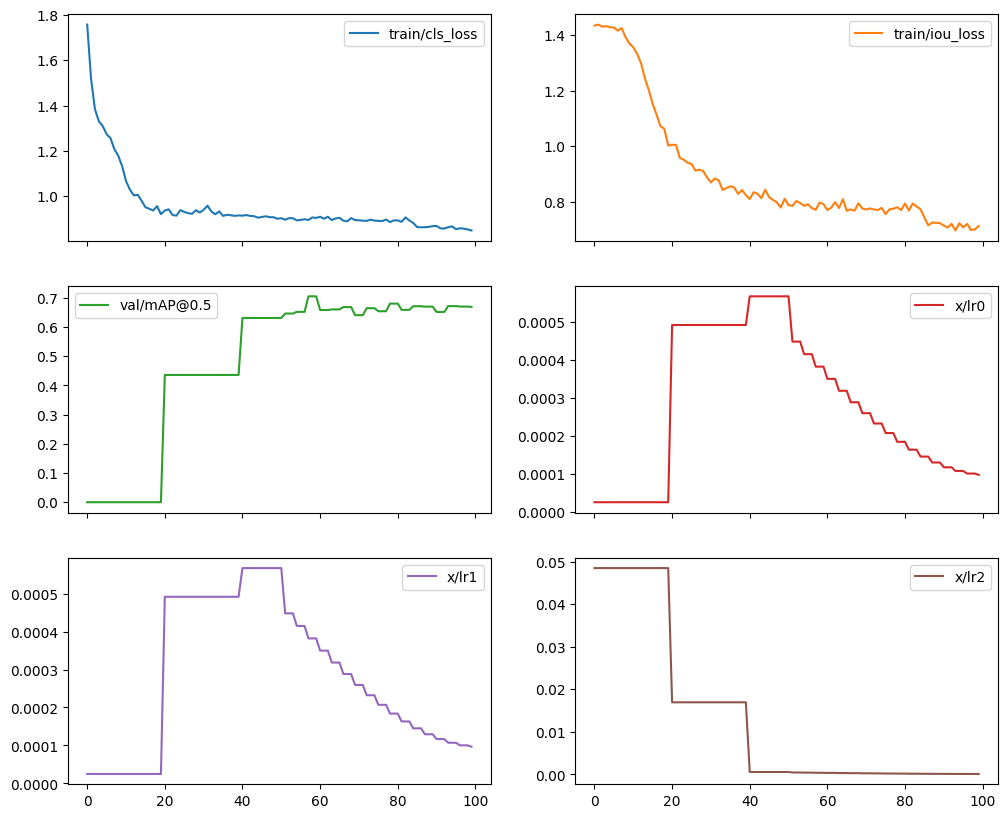

In [275]:
Graf_y6 = yolov6.filter(columns_yolov6)\
                .plot(subplots=True,layout = (3,2),figsize = (12,10))


In [276]:
columns_yolov5 = yolov5_640.columns
columns_yolov5 = columns_yolov5.drop(['epoch','metrics/mAP_0.5:0.95','train/cls_loss','val/cls_loss'])

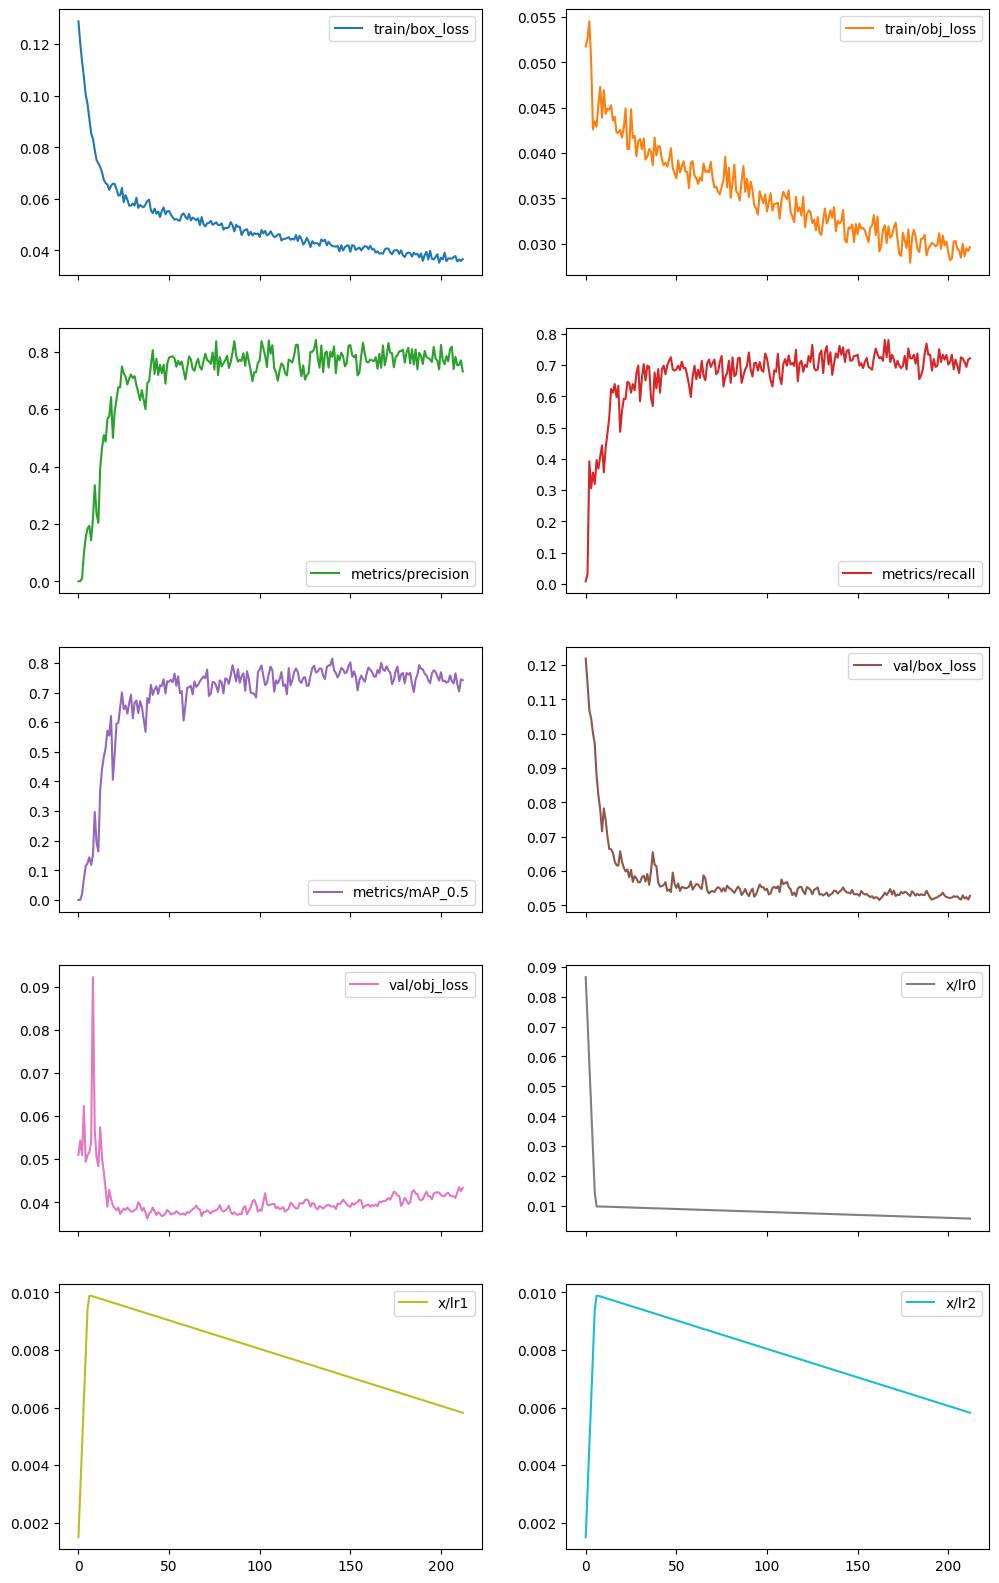

In [277]:
Graf_y5 = yolov5_640.filter(columns_yolov5)\
                .plot(subplots=True,layout = (5,2),figsize = (12,20))

In [278]:
columns_yolov7 = yolov7.columns
columns_yolov7 = columns_yolov7.drop(['epoch','GPU_mem','cls','total','labels','img_size','mAP@.5:.95','Column14','Column15'])

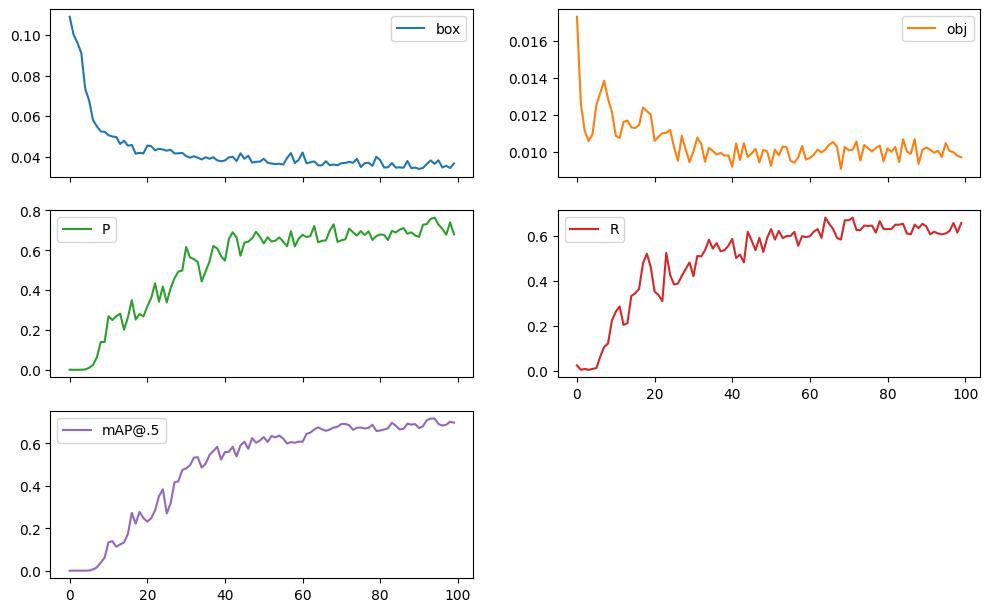

In [279]:
Graf_y7 = yolov7.filter(columns_yolov7)\
                .plot(subplots=True,layout = (4,2),figsize = (12,10))

In [280]:
columns_yolov8 = yolov8.columns
columns_yolov8 = columns_yolov8.drop(['epoch','metrics/mAP50-95(B)'])

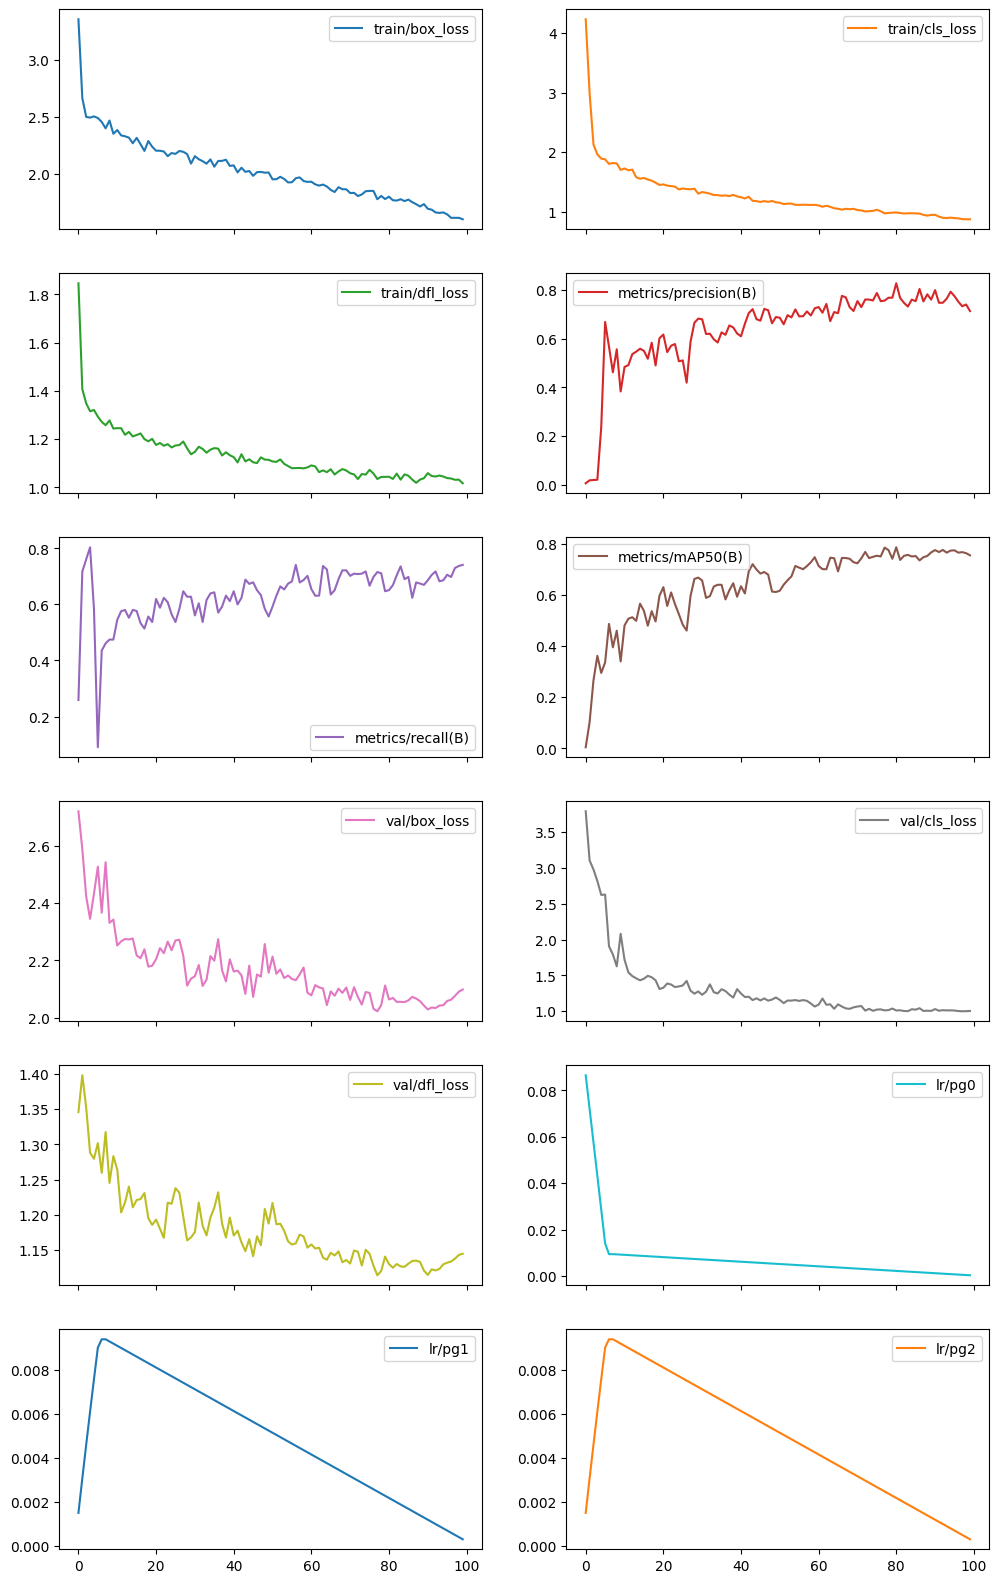

In [281]:
Graf_y8 = yolov8.filter(columns_yolov8)\
                .plot(subplots=True,layout = (6,2),figsize = (12,20))